In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 윈도우 기본 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_excel('최종 데이터셋.xlsx')
df

,가맹점구분번호,기준년월,가맹점 운영개월수 구간,매출금액 구간,매출건수 구간,유니크 고객 수 구간,객단가 구간,취소율 구간,배달매출금액 비율,동일 업종 매출금액 비율,...,유동인구 이용 고객 비율,가맹점주소,가맹점명,브랜드구분코드,가맹점지역,업종,상권,개설일,폐업일,브랜드이름
0,000F03E44A,202301,5,6,5,5,4,1.0,-999999.9,0.5,...,100.0,서울특별시 성동구 왕십리로4가길 9,육육**,중식-딤섬/중식만두1,서울 성동구,중식-딤섬/중식만두,뚝섬,20220225,-999999.9,중식-딤섬/중식만두
1,000F03E44A,202302,5,6,6,6,6,-999999.9,-999999.9,0.0,...,-999999.9,서울특별시 성동구 왕십리로4가길 9,육육**,중식-딤섬/중식만두1,서울 성동구,중식-딤섬/중식만두,뚝섬,20220225,-999999.9,중식-딤섬/중식만두
2,002816BA73,202404,2,3,4,4,2,6.0,-999999.9,96.6,...,52.4,서울 성동구 청계천로10나길 78,자갈***********,요리주점52,서울 성동구,요리주점,마장동,20140507,-999999.9,요리주점
3,002816BA73,202411,2,3,4,4,2,6.0,-999999.9,108.0,...,76.9,서울 성동구 청계천로10나길 78,자갈***********,요리주점52,서울 성동구,요리주점,마장동,20140507,-999999.9,요리주점
4,002816BA73,202406,2,4,4,4,2,1.0,-999999.9,74.2,...,69.6,서울 성동구 청계천로10나길 78,자갈***********,요리주점52,서울 성동구,요리주점,마장동,20140507,-999999.9,요리주점
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83940,63D56CEF99,202303,4,2,3,3,3,4.0,34.7,175.8,...,53.8,서울특별시 성동구 무학봉26길 12-1,곱순**,한식-육류/고기34,서울 성동구,한식-육류/고기,왕십리,20200529,-999999.9,한식-육류/고기
83941,A2D9C941A9,202304,5,2,1,1,6,2.0,2.6,249.7,...,24.4,서울특별시 성동구 행당로5길 2,메가***********,커피전문점2,서울 성동구,커피전문점,왕십리,20220823,-999999.9,커피전문점
83942,A7C2307794,202303,2,2,2,2,3,1.0,19.2,196.7,...,55.9,서울 성동구 한림말1길 8.,콩물*****,한식-두부요리1,서울 성동구,한식-두부요리,옥수,20140508,-999999.9,한식-두부요리
83943,C59F032CAC,202406,1,2,2,2,4,2.0,24.0,116.5,...,48.7,서울 성동구 왕십리로 223-1,밸런***,샌드위치/토스트1,서울 성동구,샌드위치/토스트,한양대,20090421,-999999.9,샌드위치/토스트


In [4]:
df['가맹점구분번호'].nunique()

4043

In [5]:
a = df.groupby('업종')['가맹점구분번호'].nunique().reset_index(name = '가맹점수')
a.to_excel('업종별 가맹점수.xlsx', index = False)

In [6]:
업종_상권분포 = (
    df.groupby(['업종', '상권'])['가맹점구분번호']
          .nunique()
          .reset_index(name='가맹점수')
)

업종_상권분포['비율(%)'] = (
    업종_상권분포.groupby('업종')['가맹점수']
             .transform(lambda x: x / x.sum() * 100))
업종_상권분포

,업종,상권,가맹점수,비율(%)
0,건강식품,금남시장,3,25.000000
1,건강식품,마장동,1,8.333333
2,건강식품,압구정로데오,1,8.333333
3,건강식품,왕십리,4,33.333333
4,건강식품,장한평자동차,1,8.333333
...,...,...,...,...
463,호프/맥주,성수,16,19.277108
464,호프/맥주,신금호,3,3.614458
465,호프/맥주,옥수,2,2.409639
466,호프/맥주,왕십리,22,26.506024


In [7]:
import pandas as pd

# 1️⃣ 업종별·상권별 가맹점 수 계산
업종_상권분포 = (
    df.groupby(['업종', '상권'])['가맹점구분번호']
      .nunique()
      .reset_index(name='가맹점수')
)

# 2️⃣ 업종별 상권비율 계산 (업종 내 비중)
업종_상권분포['상권비율(%)'] = (
    업종_상권분포.groupby('업종')['가맹점수']
             .transform(lambda x: x / x.sum() * 100)
)

# ------------------------------------------------
# 3️⃣ 업종 기준 출력 함수
# ------------------------------------------------

def 업종기준_출력(업종명, topn=None):
    subset = 업종_상권분포[업종_상권분포['업종'] == 업종명] \
        .sort_values('가맹점수', ascending=False)
    
    # 전체 가맹점 수
    전체 = subset['가맹점수'].sum()

    # topn 지정 (없으면 전체)
    if topn:
        subset = subset.head(topn)
    
    print(f"\n-- {업종명} 업종의 상권 분포 ({'Top '+str(topn) if topn else '전체'}) ---")
    print(f"전체 가맹점 수: {전체}개")
    
    for _, row in subset.iterrows():
        print(f"{row['상권']}: {row['상권비율(%)']:.1f}% ({int(row['가맹점수'])}개)")
# 업종별 전체 가맹점수 기준 내림차순 정렬
업종순서 = (
    업종_상권분포.groupby('업종')['가맹점수']
          .sum()
          .sort_values(ascending=False)
          .index
)

# 정렬된 순서대로 출력
for 업종명 in 업종순서:
    업종기준_출력(업종명, topn=5)


-- 한식-육류/고기 업종의 상권 분포 (Top 5) ---
전체 가맹점 수: 430개
왕십리: 25.8% (111개)
성수: 22.1% (95개)
마장동: 13.3% (57개)
한양대: 10.5% (45개)
뚝섬: 7.9% (34개)

-- 카페 업종의 상권 분포 (Top 5) ---
전체 가맹점 수: 343개
성수: 35.6% (122개)
뚝섬: 19.2% (66개)
왕십리: 15.5% (53개)
한양대: 6.7% (23개)
옥수: 5.5% (19개)

-- 백반/가정식 업종의 상권 분포 (Top 5) ---
전체 가맹점 수: 342개
성수: 32.2% (110개)
왕십리: 20.2% (69개)
뚝섬: 11.4% (39개)
마장동: 7.3% (25개)
금남시장: 6.7% (23개)

-- 한식-단품요리일반 업종의 상권 분포 (Top 5) ---
전체 가맹점 수: 288개
성수: 29.2% (84개)
왕십리: 21.5% (62개)
한양대: 13.5% (39개)
뚝섬: 11.1% (32개)
금남시장: 8.0% (23개)

-- 축산물 업종의 상권 분포 (Top 5) ---
전체 가맹점 수: 278개
마장동: 76.3% (212개)
왕십리: 9.7% (27개)
성수: 3.2% (9개)
금남시장: 2.9% (8개)
답십리: 2.2% (6개)

-- 커피전문점 업종의 상권 분포 (Top 5) ---
전체 가맹점 수: 177개
성수: 31.1% (55개)
왕십리: 20.3% (36개)
뚝섬: 15.3% (27개)
한양대: 9.0% (16개)
마장동: 6.2% (11개)

-- 양식 업종의 상권 분포 (Top 5) ---
전체 가맹점 수: 169개
성수: 42.6% (72개)
뚝섬: 21.9% (37개)
왕십리: 12.4% (21개)
금남시장: 5.9% (10개)
옥수: 5.9% (10개)

-- 식료품 업종의 상권 분포 (Top 5) ---
전체 가맹점 수: 153개
성수: 27.5% (42개)
왕십리: 19.6% (30개)
마장동: 13.1% (20개)
금남시장:

In [8]:
import pandas as pd
import numpy as np

# -----------------------------------------
# 1️⃣ 고객 관련 컬럼 설정
# -----------------------------------------
고객컬럼 = [
    '남성 20대이하 고객 비중', '남성 30대 고객 비중', '남성 40대 고객 비중', 
    '남성 50대 고객 비중', '남성 60대이상 고객 비중',
    '여성 20대이하 고객 비중', '여성 30대 고객 비중', '여성 40대 고객 비중',
    '여성 50대 고객 비중', '여성 60대이상 고객 비중'
]

# 음수값 NaN 처리
df[고객컬럼] = df[고객컬럼].applymap(lambda x: np.nan if x < 0 else x)

# -----------------------------------------
# 2️⃣ 업종별 평균 비율 계산
# -----------------------------------------
업종별_고객평균 = df.groupby('업종')[고객컬럼].mean().reset_index()

# -----------------------------------------
# 3️⃣ 상위 3개 핵심고객층 분리 저장
# -----------------------------------------
결과리스트 = []

for _, row in 업종별_고객평균.iterrows():
    업종명 = row['업종']
    고객비중 = row[고객컬럼].dropna().sort_values(ascending=False)
    
    # 상위 3개 추출 (부족하면 NaN으로 채움)
    top = [f"{col.replace(' 고객 비중','')} ({val:.1f}%)" for col, val in 고객비중.head(3).items()]
    while len(top) < 3:
        top.append(np.nan)
    
    결과리스트.append({
        '업종': 업종명,
        '핵심고객층1': top[0],
        '핵심고객층2': top[1],
        '핵심고객층3': top[2]
    })

업종별_핵심고객 = pd.DataFrame(결과리스트)
업종별_핵심고객.to_excel('업종별_핵심고객층.xlsx', index=False)


C:\Users\User\AppData\Local\Temp\ipykernel_12332\1459555560.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[고객컬럼] = df[고객컬럼].applymap(lambda x: np.nan if x < 0 else x)


In [9]:
import pandas as pd
import numpy as np

# -----------------------------------------
# 1️⃣ 분석 대상 컬럼 설정
# -----------------------------------------
cols = [
    '재방문 고객 비중',
    '신규 고객 비중',
    '거주 이용 고객 비율',
    '직장 이용 고객 비율',
    '유동인구 이용 고객 비율'
]

# -----------------------------------------
# 2️⃣ 음수값 NaN 처리
# -----------------------------------------
df[cols] = df[cols].applymap(lambda x: np.nan if x < 0 else x)

# -----------------------------------------
# 3️⃣ 업종별 평균 계산
# -----------------------------------------
업종별_패턴 = (
    df.groupby('업종')[cols]
      .mean()
      .reset_index()
      .round(1)
)

# -----------------------------------------
# 4️⃣ 재방문 고객 비중 기준 내림차순 정렬
# -----------------------------------------
업종별_패턴 = 업종별_패턴.sort_values('재방문 고객 비중', ascending=False)

업종별_패턴.to_excel('업종별_고객패턴.xlsx', index=False)


C:\Users\User\AppData\Local\Temp\ipykernel_12332\481046133.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[cols] = df[cols].applymap(lambda x: np.nan if x < 0 else x)


In [10]:
#운영기간별 매출규모
#운영기간별 매출건수추이
#배달매출 비중 분석
# -----------------------------------------
# 1️⃣ 분석 대상 컬럼 지정
# -----------------------------------------
cols = ['업종', '가맹점 운영개월수 구간', '매출금액 구간', '매출건수 구간', '배달매출금액 비율']

# 음수값 NaN 처리
df[cols] = df[cols].applymap(lambda x: np.nan if isinstance(x, (int, float)) and x < 0 else x)

# -----------------------------------------
# 2️⃣ 업종별·운영개월별 평균 계산
# -----------------------------------------
업종별_운영개월_추이 = (
    df.groupby(['업종', '가맹점 운영개월수 구간'])[['매출금액 구간', '매출건수 구간', '배달매출금액 비율']]
      .mean()
      .reset_index()
      .sort_values(['업종', '가맹점 운영개월수 구간'])
)

업종별_운영개월_추이.to_excel('업종별_운영개월구간별 매출_추이.xlsx', index=False)

C:\Users\User\AppData\Local\Temp\ipykernel_12332\3206414338.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[cols] = df[cols].applymap(lambda x: np.nan if isinstance(x, (int, float)) and x < 0 else x)


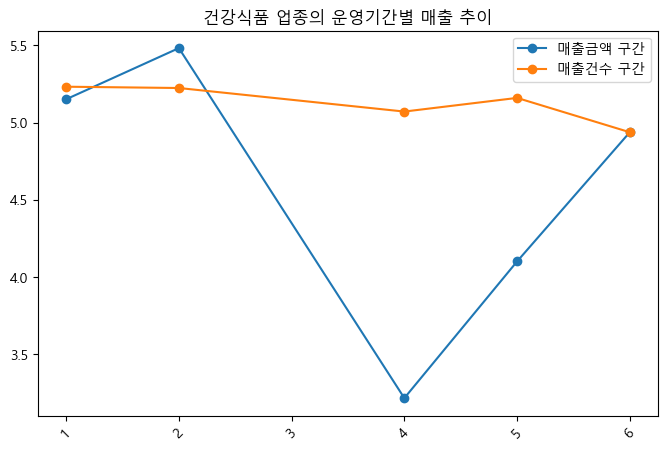

In [11]:
import matplotlib.pyplot as plt

# 예시 업종
target = '건강식품'
subset = 업종별_운영개월_추이[업종별_운영개월_추이['업종'] == target]

plt.figure(figsize=(8,5))
plt.plot(subset['가맹점 운영개월수 구간'], subset['매출금액 구간'], marker='o', label='매출금액 구간')
plt.plot(subset['가맹점 운영개월수 구간'], subset['매출건수 구간'], marker='o', label='매출건수 구간')
plt.xticks(rotation=45)
plt.title(f"{target} 업종의 운영기간별 매출 추이")
plt.legend()
plt.show()

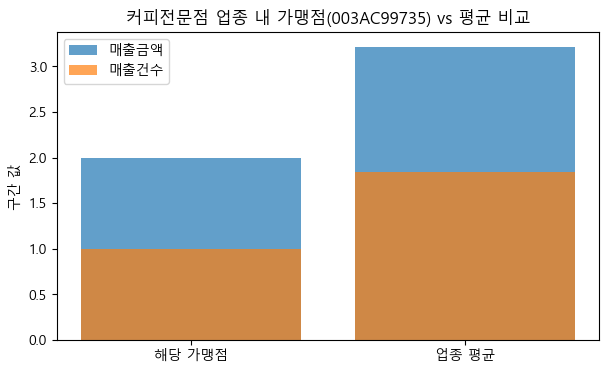

In [12]:

# 예시: 특정 가맹점 입력
target_id = '003AC99735'

# 1️⃣ 해당 가맹점의 정보
target = df[df['가맹점구분번호'] == target_id].iloc[0]
업종명 = target['업종']

# 2️⃣ 동일 업종 평균 계산
업종평균 = df[df['업종'] == 업종명][['매출금액 구간', '매출건수 구간']].mean()

# 3️⃣ 비교용 데이터프레임 생성
비교 = pd.DataFrame({
    '구분': ['해당 가맹점', '업종 평균'],
    '매출금액 구간': [target['매출금액 구간'], 업종평균['매출금액 구간']],
    '매출건수 구간': [target['매출건수 구간'], 업종평균['매출건수 구간']]
})

# 4️⃣ 시각화
plt.figure(figsize=(7,4))
plt.bar(비교['구분'], 비교['매출금액 구간'], alpha=0.7, label='매출금액')
plt.bar(비교['구분'], 비교['매출건수 구간'], alpha=0.7, label='매출건수')
plt.title(f"{업종명} 업종 내 가맹점({target_id}) vs 평균 비교")
plt.ylabel('구간 값')
plt.legend()
plt.show()


## 기존

In [13]:
df['기준년월'] = pd.to_datetime(df['기준년월'], format='%Y%m')

In [14]:
# 매출건수 구간별 빈도
count_trend = (
    df.groupby(['기준년월', '업종', '매출건수 구간'])
      .size()
      .reset_index(name='count')
)

# 매출금액 구간별 빈도
amount_trend = (
    df.groupby(['기준년월', '업종', '매출금액 구간'])
      .size()
      .reset_index(name='count')
)
count_trend, amount_trend

(           기준년월     업종  매출건수 구간  count
 0    2023-01-01   건강식품        4      2
 1    2023-01-01   건강식품        5      4
 2    2023-01-01   건강식품        6      3
 3    2023-01-01    건강원        4      1
 4    2023-01-01    건강원        5      2
 ...         ...    ...      ...    ...
 6806 2024-12-01  호프/맥주        2      6
 6807 2024-12-01  호프/맥주        3     17
 6808 2024-12-01  호프/맥주        4     32
 6809 2024-12-01  호프/맥주        5     20
 6810 2024-12-01  호프/맥주        6      8
 
 [6811 rows x 4 columns],
            기준년월     업종  매출금액 구간  count
 0    2023-01-01   건강식품        1      1
 1    2023-01-01   건강식품        5      5
 2    2023-01-01   건강식품        6      3
 3    2023-01-01    건강원        5      3
 4    2023-01-01    건강원        6      5
 ...         ...    ...      ...    ...
 7166 2024-12-01  호프/맥주        2     13
 7167 2024-12-01  호프/맥주        3     23
 7168 2024-12-01  호프/맥주        4     18
 7169 2024-12-01  호프/맥주        5     17
 7170 2024-12-01  호프/맥주        6      8
 
 [7171 row

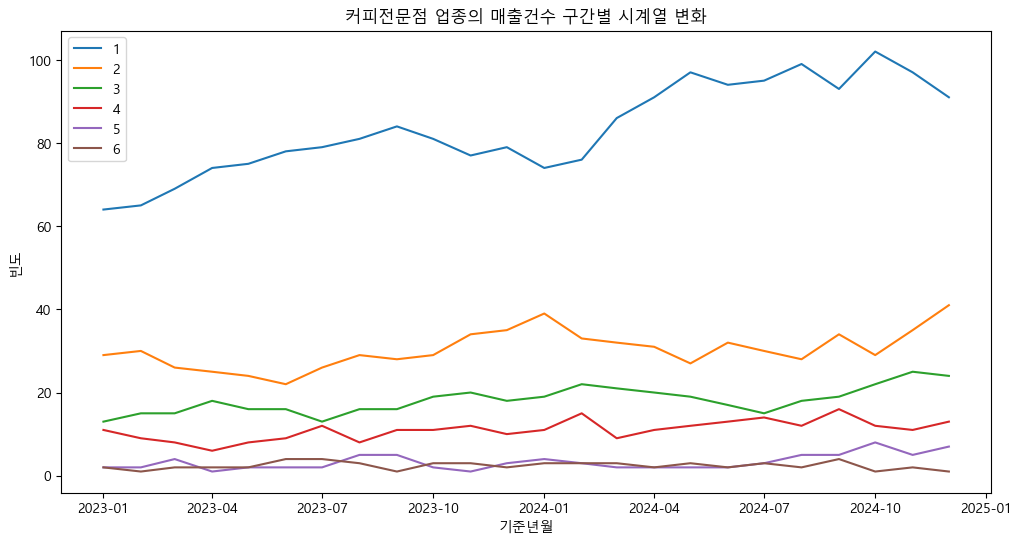

In [15]:
import matplotlib.pyplot as plt

# 특정 업종 예시 (예: 커피전문점)
target = '커피전문점'
subset = count_trend[count_trend['업종'] == target]

plt.figure(figsize=(12,6))
for g in subset['매출건수 구간'].unique():
    temp = subset[subset['매출건수 구간'] == g]
    plt.plot(temp['기준년월'], temp['count'], label=g)

plt.title(f'{target} 업종의 매출건수 구간별 시계열 변화')
plt.xlabel('기준년월')
plt.ylabel('빈도')
plt.legend()
plt.show()


In [16]:
coffee = df[df['업종'] == '담배']

In [17]:
import pandas as pd
import numpy as np

# --------------------------
# 1️⃣ 구간 문자열을 평균값으로 변환하는 함수
# --------------------------
def 구간평균(값):
    if pd.isna(값):
        return np.nan
    # '0~10' 같은 형태 처리
    if '~' in str(값):
        시작, 끝 = str(값).split('~')
        try:
            return (float(시작) + float(끝)) / 2
        except:
            return np.nan
    # 이미 숫자이거나 변환 불가한 값은 그대로 반환
    try:
        return float(값)
    except:
        return np.nan

# --------------------------
# 2️⃣ 구간을 숫자 평균으로 변환
# --------------------------
coffee['매출건수_평균'] = coffee['매출건수 구간'].apply(구간평균)
coffee['매출금액_평균'] = coffee['매출금액 구간'].apply(구간평균)

# --------------------------
# 3️⃣ 월별 · 업종별 평균 계산
# --------------------------
count_trend = (
    coffee.groupby(['기준년월', '업종'])['매출건수_평균']
          .mean()
          .reset_index(name='매출건수_평균')
)

amount_trend = (
    coffee.groupby(['기준년월', '업종'])['매출금액_평균']
          .mean()
          .reset_index(name='매출금액_평균')
)

count_trend

C:\Users\User\AppData\Local\Temp\ipykernel_12332\170921512.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee['매출건수_평균'] = coffee['매출건수 구간'].apply(구간평균)
C:\Users\User\AppData\Local\Temp\ipykernel_12332\170921512.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee['매출금액_평균'] = coffee['매출금액 구간'].apply(구간평균)


,기준년월,업종,매출건수_평균
0,2023-01-01,담배,4.555556
1,2023-02-01,담배,4.444444
2,2023-03-01,담배,4.555556
3,2023-04-01,담배,4.333333
4,2023-05-01,담배,4.444444
5,2023-06-01,담배,4.333333
6,2023-07-01,담배,4.600000
7,2023-08-01,담배,4.200000
8,2023-09-01,담배,4.500000
9,2023-10-01,담배,4.400000


In [18]:
df[df['업종'] == '담배']

,가맹점구분번호,기준년월,가맹점 운영개월수 구간,매출금액 구간,매출건수 구간,유니크 고객 수 구간,객단가 구간,취소율 구간,배달매출금액 비율,동일 업종 매출금액 비율,...,유동인구 이용 고객 비율,가맹점주소,가맹점명,브랜드구분코드,가맹점지역,업종,상권,개설일,폐업일,브랜드이름
611,1025481D02,2023-05-01,4,4,4,4,3,1.0,NaN,87.0,...,40.7,서울특별시 성동구 아차산로 96,나이*****,담배1,서울 성동구,담배,성수,20190531,-999999.9,담배
851,15EE2AE836,2023-05-01,2,5,5,5,3,1.0,NaN,14.2,...,37.5,서울 성동구 금호동3가,조아*******,담배7,서울 성동구,담배,금남시장,20110127,-999999.9,담배
852,15EE2AE836,2023-08-01,2,5,5,5,3,1.0,NaN,21.7,...,33.3,서울 성동구 금호동3가,조아*******,담배7,서울 성동구,담배,금남시장,20110127,-999999.9,담배
853,15EE2AE836,2024-08-01,2,5,5,5,3,1.0,NaN,3.2,...,0.0,서울 성동구 금호동3가,조아*******,담배7,서울 성동구,담배,금남시장,20110127,-999999.9,담배
854,15EE2AE836,2024-10-01,2,5,5,5,4,1.0,NaN,4.6,...,66.7,서울 성동구 금호동3가,조아*******,담배7,서울 성동구,담배,금남시장,20110127,-999999.9,담배
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76071,BD8A0F6D76,2023-02-01,5,4,4,4,3,1.0,NaN,43.7,...,61.1,서울특별시 성동구 왕십리로 336,렉스*****,담배2,서울 성동구,담배,왕십리,20211117,-999999.9,담배
76531,1025481D02,2024-07-01,3,4,4,4,3,1.0,NaN,58.4,...,64.7,서울특별시 성동구 아차산로 96,나이*****,담배1,서울 성동구,담배,성수,20190531,-999999.9,담배
79552,15EE2AE836,2024-12-01,2,5,5,5,4,6.0,NaN,7.7,...,33.3,서울 성동구 금호동3가,조아*******,담배7,서울 성동구,담배,금남시장,20110127,-999999.9,담배
80128,74D5125FD6,2024-03-01,2,5,5,5,3,1.0,NaN,7.4,...,33.3,서울 성동구 왕십리로 102,베스****,담배3,서울 성동구,담배,뚝섬,20100920,-999999.9,담배
